## Machine Learning Approach to Ensemble IDS system for IoT systems

In this notebook, we create an ensemble machine learning algorithms for IoT systems using two different datasets.
The [CICIDS2017](https://www.unb.ca/cic/datasets/ids-2017.html) which is considered the most updated IDS dataset and its improved version [CSE-CICIDS2018](https://www.unb.ca/cic/datasets/ids-2018.html) will be used in this research.
> We are going to use the following  ML algorthms for the work.
1. Decision tree
2. Random Forest
3. Extra tree
4. Xgboost
5. Adaboost
6. LightGBM 

# Import all the necessary libraries

In [2]:
import os, time
# Data Wrangling
import numpy as np
import pandas as pd

# Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px
import pickle

# Model Building
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb


# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold

%matplotlib inline

# Import the datasets
In this notebook, we will handle the CSE-CICIDS2018 dataset first.

In [3]:
data = pd.read_csv('./sampled_dataset_2017.csv')
data.head(5)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1,2,0,12.0,0.0,6.0,6.0,6.00000,0.0000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,3,2,0,12.0,0.0,6.0,6.0,6.00000,0.0000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,1,2,0,12.0,0.0,6.0,6.0,6.00000,0.0000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,876,9,4,630.0,2942.0,300.0,0.0,70.00000,130.4224,1471.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,1009,7,4,2748.0,2780.0,1365.0,0.0,392.57144,664.3006,1390.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
sample_data = data
sample_data['Label'].value_counts()

BENIGN          589822
Web Attack      472530
Bot             472390
DDoS            472244
DoS             471968
Infiltration    471756
PortScan        471603
Brute Force     471281
Heartbleed      471090
Name: Label, dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, LabelEncoder
# scale the numerical values
scaler = MaxAbsScaler()
numeric_features = sample_data.dtypes[sample_data.dtypes != 'object'].index
sample_data[numeric_features] = scaler.fit_transform(sample_data[numeric_features])

In [6]:
sample_data[numeric_features]

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,8.333334e-09,0.000009,0.000000,0.000004,0.000000,0.000242,0.002581,0.001010,0.000000,0.000000,...,0.000005,3.725292e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.500000e-08,0.000009,0.000000,0.000004,0.000000,0.000242,0.002581,0.001010,0.000000,0.000000,...,0.000005,3.725292e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.333334e-09,0.000009,0.000000,0.000004,0.000000,0.000242,0.002581,0.001010,0.000000,0.000000,...,0.000005,3.725292e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.300000e-06,0.000041,0.000014,0.000220,0.000004,0.012087,0.000000,0.011783,0.018559,0.084657,...,0.000033,3.725292e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.408334e-06,0.000032,0.000014,0.000959,0.000004,0.054996,0.000000,0.066080,0.094529,0.079995,...,0.000023,3.725292e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364679,4.278512e-02,0.000014,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.960467e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4364680,4.858249e-02,0.000014,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.960467e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4364681,4.995944e-02,0.000014,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.960467e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4364682,4.994347e-02,0.000014,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.960467e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

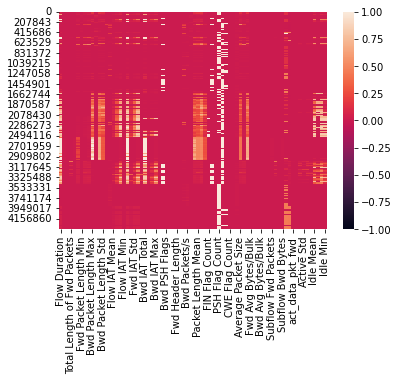

In [8]:
sns.heatmap(sample_data[numeric_features])

In [9]:
label_encoder = LabelEncoder()
sample_data.iloc[:,-1] = label_encoder.fit_transform(sample_data.iloc[:,-1])
X = sample_data.drop(['Label'], axis=1).values
y = sample_data.iloc[:, -1].values.reshape(-1,1)
y = np.ravel(y)

In [10]:
X

array([[8.33333382e-09, 9.10087869e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50000015e-08, 9.10087869e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.33333382e-09, 9.10087869e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.99594362e-02, 1.36513180e-05, 3.42557258e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.99434696e-02, 1.36513180e-05, 3.42557258e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.24205775e-02, 1.36513180e-05, 3.42557258e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [11]:
y

array([0, 0, 0, ..., 8, 8, 8])

In [12]:
import collections

In [13]:
print(collections.Counter(y))

Counter({0: 589822, 8: 472530, 1: 472390, 3: 472244, 4: 471968, 6: 471756, 7: 471603, 2: 471281, 5: 471090})


In [14]:
y.shape

(4364684,)

In [10]:
#strategy = {6:110687}
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority', n_jobs=-1, k_neighbors=1, random_state=42)
X, y = smote.fit_resample(X, y)

In [11]:
pd.Series(y).value_counts()

0    589822
2    589822
4    589822
5    589822
8    589822
6    589822
1    589822
7    589822
3    589822
dtype: int64

# Building the Machine Learning Algorithms.

All ML are built using their default parameters. No tunning has been done in this notebook. The tunning will be integrated with the ensemble models which will be developed in another notebook. Each algorithm has been trained using the StratifiedKFold validation split.

## Decision Tree

In [12]:
from joblib import Parallel, delayed
import joblib
import time

In [13]:
dec_tree = DecisionTreeClassifier(random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_acc_dec = []

start_time = time.time()
for train_index, test_index in skf.split(X, y):
    X_train_f, X_test_f = X[train_index], X[test_index]
    y_train_f, y_test_f = y[train_index], y[test_index]
    dec_tree.fit(X_train_f, y_train_f)
    skf_acc_dec.append(dec_tree.score(X_test_f, y_test_f))
time_taken = time.time() - start_time
print(f'Total training time: {time_taken}')

# Save the Model
filename = './Models/Decision_tree_model.pkl'
filename2 = './Models/Decision_tree_model.sav'
joblib.dump(dec_tree, open(filename, 'wb'))


Total training time: 2073.1917958259583


AttributeError: module 'joblib' has no attribute 'dum'

In [14]:
joblib.dump(dec_tree, open(filename2, 'wb'))

List of possible accuracy: [0.9958009946499887, 0.9956258006178886, 0.9959686534549017, 0.9957934594228016, 0.9958047622635823, 0.995865044081079, 0.9959535830005275, 0.995915906864592, 0.9957953353088225, 0.995900828688171]

Maximum Accuracy That can be obtained from this model is: 99.59686534549017 %

Minimum Accuracy: 99.56258006178886 %

Overall Accuracy: (99.58424368352354, '%')

Standard Deviation is: (0.009606667781254068, '%')
Prediction time:  0.1855316162109375
Precision of DT: 0.9959023552080889
Recall of DT: 0.995900828688171
F1 Score of DT: 0.9958985648748911
Classification Report: 
               precision    recall  f1-score   support

           0     0.9856    0.9776    0.9816     58982
           1     0.9989    0.9996    0.9992     58982
           2     0.9999    1.0000    0.9999     58982
           3     0.9804    0.9869    0.9836     58982
           4     0.9991    0.9994    0.9992     58982
           5     1.0000    1.0000    1.0000     58982
           6     

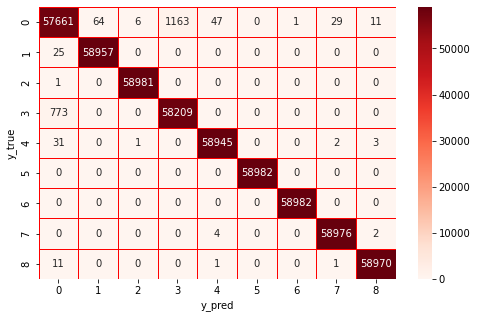

In [15]:

# Print the output.
print('List of possible accuracy:', skf_acc_dec)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(skf_acc_dec)*100, '%')
print('\nMinimum Accuracy:',
      min(skf_acc_dec)*100, '%')
print('\nOverall Accuracy:', (np.mean(skf_acc_dec)*100, '%'))
print('\nStandard Deviation is:', (np.std(skf_acc_dec)*100, '%'))

start = time.time()
# Making Predictions
y_pred = dec_tree.predict(X_test_f)
stop = time.time()
print('Prediction time: ', stop-start)
y_true = y_test_f

# print the scores
#print('Accuracy of DT: '+ str(decision_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of DT: '+ (str(precision)))
print('Recall of DT: '+ (str(recall)))
print('F1 Score of DT: '+ (str(fscore)))

# print classifcation report
print("Classification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap='Reds', linecolor='red', linewidths=0.5, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./Images/Decision_tree_cm.png')
plt.show()

## PREDICTING FOR AUC (DT)

ROC Value:  99.76612430961276 %


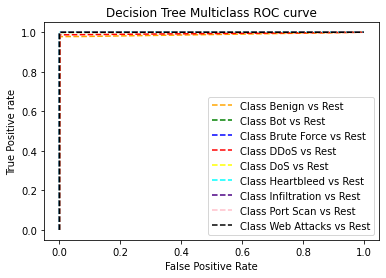

In [16]:
y_pred_prob = dec_tree.predict_proba(X_test_f)
y_true = y_test_f

roc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print('ROC Value: ', (roc)*100, '%')

# Plot roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 9

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_pred_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Bot vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Brute Force vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class DDoS vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class DoS vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='cyan', label='Class Heartbleed vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='Class Infiltration vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class Port Scan vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='black', label='Class Web Attacks vs Rest')
plt.title('Decision Tree Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('./Images/Decicion_Tree_ROC',dpi=300); 

# PRinting ROC USING ANOTHER APPROACH

In [30]:
# Learn to predict each class against the other
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))


AttributeError: This 'OneVsRestClassifier' has no attribute 'decision_function'

In [35]:
y_test_f

array([0, 0, 0, ..., 8, 8, 8])

In [33]:
y_score = classifier.predict(X_test_f)
n_classes = 9
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_f[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_fact.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

TypeError: Singleton array 0 cannot be considered a valid collection.

# Random Forest Classifier

Total training time: 18572.552990436554
************Decision Tree*************
List of possible accuracy: [0.9946010097204431, 0.9944936327330269, 0.9948459046040238, 0.9945124708009947, 0.9947535980709818, 0.9946028935272399, 0.9949664682390174, 0.9948364855700399, 0.9944540623428195, 0.9947856129636293]

Maximum Accuracy That can be obtained from this model is: 99.49664682390174 %

Minimum Accuracy: 99.44540623428195 %

Overall Accuracy:  (99.46852138572216, '%')

Standard Deviation is: (0.01662547871060592, '%')
Prediction time: 6.832733154296875
Precision of RF: 0.9948842708123244
Recall of RF: 0.9947856129636293
F1 Score of RF: 0.9947556512628818
Classification Report: 
               precision    recall  f1-score   support

           0     0.9985    0.9551    0.9763     58982
           1     0.9902    1.0000    0.9951     58982
           2     0.9996    0.9997    0.9996     58982
           3     0.9713    0.9996    0.9852     58982
           4     0.9961    0.9998    0.9979 

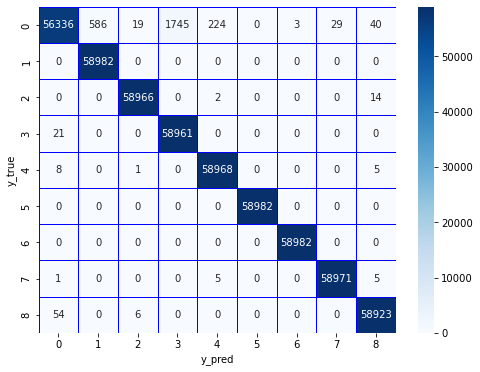

In [17]:
rfc = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_acc_rfc = []

start=time.time()
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rfc.fit(X_train_fold, y_train_fold)
    skf_acc_rfc.append(rfc.score(X_test_fold, y_test_fold))
stop=time.time()
print(f'Total training time: {stop-start}')

# Save the Model
filename = './Models/Random_forest_model.sav'
filename2 = './Models/Random_forest_model.pkl'
joblib.dump(rfc, open(filename, 'wb'))
joblib.dump(rfc, open(filename2, 'wb'))

# Print the output.
print('************Decision Tree*************')
print('List of possible accuracy:', skf_acc_rfc)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(skf_acc_rfc)*100, '%')
print('\nMinimum Accuracy:',
      min(skf_acc_rfc)*100, '%')
print('\nOverall Accuracy: ', (np.mean(skf_acc_rfc)*100, '%'))
print('\nStandard Deviation is:', (np.std(skf_acc_rfc)*100, '%'))


# Making Predictions
start = time.time()
y_pred = rfc.predict(X_test_fold)
y_true = y_test_fold
stop = time.time()
print(f'Prediction time: {stop-start}')

# print the scores
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of RF: '+ (str(precision)))
print('Recall of RF: '+ (str(recall)))
print('F1 Score of RF: '+ (str(fscore)))

# print classifcation report
print("Classification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', linecolor='blue', linewidths=0.6, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./Images/Random_forest_cm')
plt.show()

## Predict for the ROC Plots

ROC Value:  99.98214201137183 %


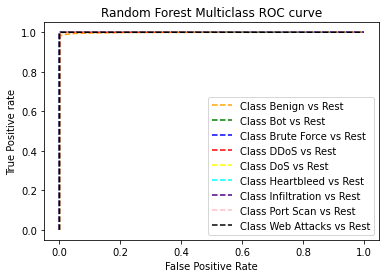

In [18]:
y_pred_prob = rfc.predict_proba(X_test_fold)
y_true = y_test_fold

roc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print('ROC Value: ', (roc)*100, '%')

# Plot roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 9

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_pred_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Bot vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Brute Force vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class DDoS vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class DoS vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='cyan', label='Class Heartbleed vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='Class Infiltration vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class Port Scan vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='black', label='Class Web Attacks vs Rest')
plt.title('Random Forest Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('./Images/Random_forest_ROC',dpi=300); 

In [19]:
import time

# Adaboost Training

Training Time:  13429.48023724556
List of possible accuracy: [0.6339838746138196, 0.42203112048828273, 0.4220574937834376, 0.4198232989224625, 0.4129003089443147, 0.6003842965865421, 0.422204430713586, 0.5315311581644186, 0.5310423687784809, 0.3664237179257741]

Maximum Accuracy That can be obtained from this model is: 63.39838746138196 %

Minimum Accuracy: 36.64237179257741 %

gAverage Accuracy:  47.62382068921119 %

Standard Deviation Accuracy:  8.62577033626152 %
Time taken to make predictions:  10.4016273021698


C:\Users\Demostenes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Demostenes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of Adaboost: 0.3355197565629335
Recall of Adaboost: 0.3664237179257741
F1 Score of Adaboost: 0.2681567717946091


C:\Users\Demostenes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Demostenes\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report: 
               precision    recall  f1-score   support

           0     0.1001    0.1406    0.1170     58982
           1     0.0000    0.0000    0.0000     58982
           2     0.3175    0.9995    0.4819     58982
           3     0.2967    0.3722    0.3302     58982
           4     0.9402    0.0128    0.0253     58982
           5     0.0000    0.0000    0.0000     58982
           6     0.4079    0.9412    0.5692     58982
           7     0.0000    0.0000    0.0000     58982
           8     0.9572    0.8315    0.8900     58983

    accuracy                         0.3664    530839
   macro avg     0.3355    0.3664    0.2682    530839
weighted avg     0.3355    0.3664    0.2682    530839



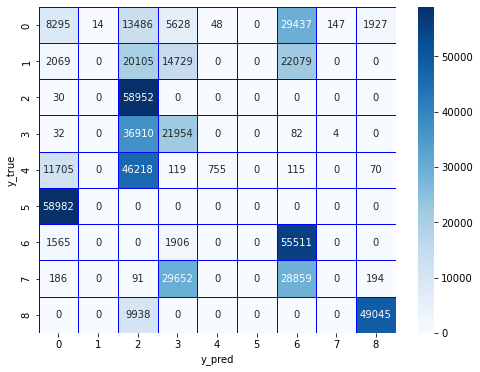

In [19]:
adaboost = AdaBoostClassifier(random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_acc_ada = []
start_time = time.time()
for train_index, test_index in skf.split(X, y):
    X_train_fa, X_test_fa = X[train_index], X[test_index]
    y_train_fa, y_test_fa = y[train_index], y[test_index]
    adaboost.fit(X_train_fa, y_train_fa)
    skf_acc_ada.append(adaboost.score(X_test_fa, y_test_fa))
end_time = time.time()
time_elapsed = end_time-start_time
print('Training Time: ', time_elapsed)

# Save the Model
filename = './Models/Adaboost_model.sav'
joblib.dump(adaboost, open(filename, 'wb'))
filename2 = './Models/Adaboost_model.pkl'
joblib.dump(adaboost, open(filename, 'wb'))

# Print the output.
print('List of possible accuracy:', skf_acc_ada)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(skf_acc_ada)*100, '%')
print('\nMinimum Accuracy:',
      min(skf_acc_ada)*100, '%')
print('\ngAverage Accuracy: ', np.mean(skf_acc_ada)*100, '%')
print('\nStandard Deviation Accuracy: ', np.std(skf_acc_ada)*100, '%')


# Making Predictions
test_time_start = time.time()
y_pred = adaboost.predict(X_test_fa)
y_true = y_test_fa
test_time_stop = time.time()
time_taken_test = test_time_stop-test_time_start
print('Time taken to make predictions: ', time_taken_test)

# print the scores for the test
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of Adaboost: '+ (str(precision)))
print('Recall of Adaboost: '+ (str(recall)))
print('F1 Score of Adaboost: '+ (str(fscore)))

# print classifcation report
print("\nClassification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', linecolor='blue', linewidths=0.6, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./Images/Adaboost_Classifier_cm')
plt.show()

## Predicting Probabilities for AUC

ROC Value:  76.5967023765222 %


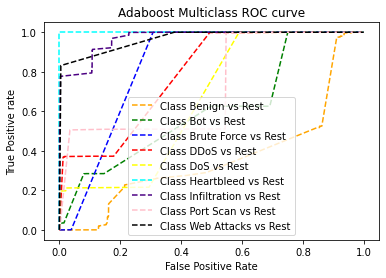

In [20]:
y_pred_prob = adaboost.predict_proba(X_test_fa)
y_true = y_test_fa

roc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print('ROC Value: ', (roc)*100, '%')

# Plot roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 9

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_pred_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Bot vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Brute Force vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class DDoS vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class DoS vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='cyan', label='Class Heartbleed vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='Class Infiltration vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class Port Scan vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='black', label='Class Web Attacks vs Rest')
plt.title('Adaboost Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('./Images/Adaboost_classifier_ROC',dpi=300); 

# LightGBM Training

Training Time:  1663.6757988929749
List of possible accuracy: [0.983921708989526, 0.9903511415869188, 0.9523547584959686, 0.9892679526787732, 0.9848146334111973, 0.9916057569135709, 0.9884277748474116, 0.9893489563710346, 0.953179777672703, 0.9643564244526118]

Maximum Accuracy That can be obtained from this model is: 99.1605756913571 %

Minimum Accuracy: 95.23547584959687 %

Average Score:  97.87628885419716 %

Standard Deviation Score:  1.4959031568744972 %
Time taken to make predictions:  5.499298334121704
Precision of LightGBM: 0.9696216979307689
Recall of LightGBM: 0.9643564244526118
F1 Score of LightGBM: 0.9643396708801868
Classification Report: 
               precision    recall  f1-score   support

           0     0.9795    0.9483    0.9636     58982
           1     0.9977    0.9992    0.9984     58982
           2     0.9998    0.9999    0.9999     58982
           3     0.8042    0.9989    0.8911     58982
           4     0.9968    0.9890    0.9929     58982
           5 

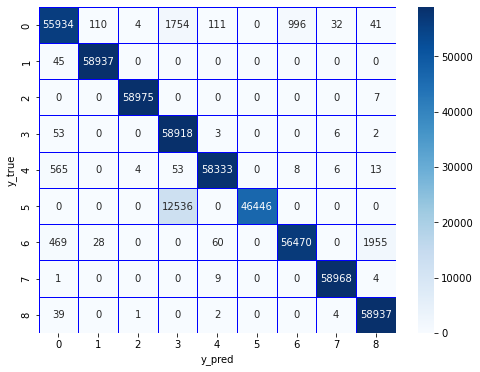

In [21]:
lgbm = LGBMClassifier(random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_acc_gbm = []
start_time = time.time()  
for train_index, test_index in skf.split(X, y):
    X_train_fgb, X_test_fgb = X[train_index], X[test_index]
    y_train_fgb, y_test_fgb = y[train_index], y[test_index]
    lgbm.fit(X_train_fgb, y_train_fgb)
    skf_acc_gbm.append(lgbm.score(X_test_fgb, y_test_fgb))
end_time = time.time()
time_elapsed = end_time-start_time
print('Training Time: ', time_elapsed)

# Save the Model
filename = './Models/LightGBM_model.sav'
joblib.dump(lgbm, open(filename, 'wb'))
filename2 = './Models/LightGBM_model.pkl'
joblib.dump(lgbm, open(filename2, 'wb'))
    
# Print the output.
print('List of possible accuracy:', skf_acc_gbm)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(skf_acc_gbm)*100, '%')
print('\nMinimum Accuracy:',
      min(skf_acc_gbm)*100, '%')
print('\nAverage Score: ', (np.mean(skf_acc_gbm)*100), '%')
print('\nStandard Deviation Score: ', (np.std(skf_acc_gbm)*100), '%')

# Making Predictions
test_time_start = time.time()
y_pred = lgbm.predict(X_test_fgb)
y_true = y_test_fgb

test_time_stop = time.time()
time_taken_test = test_time_stop-test_time_start
print('Time taken to make predictions: ', time_taken_test)

# print the scores
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of LightGBM: '+ (str(precision)))
print('Recall of LightGBM: '+ (str(recall)))
print('F1 Score of LightGBM: '+ (str(fscore)))

# print classifcation report
print("Classification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', linecolor='blue', linewidths=0.6, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./Images/LightGBM_cm')
plt.show()

## Predict Probably for ROC

ROC Value:  96.8144055518028 %


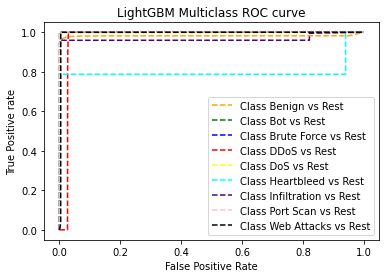

In [22]:
y_pred_prob = lgbm.predict_proba(X_test_fgb) #correct this
y_true = y_test_fgb

roc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print('ROC Value: ', (roc)*100, '%')

# Plot roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 9

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_pred_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Bot vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Brute Force vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class DDoS vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class DoS vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='cyan', label='Class Heartbleed vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='Class Infiltration vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class Port Scan vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='black', label='Class Web Attacks vs Rest')
plt.title('LightGBM Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('./Images/LightGBM_classifier_ROC',dpi=300); 

## ExtraTreeClassifier

Training Time:  12644.368225097656
List of possible accuracy: [0.9966411724813503, 0.9965337954939342, 0.9968408560018085, 0.9965940773114309, 0.996618566799789, 0.9966807324240826, 0.9967165247532213, 0.9967994122522794, 0.9966543528263748, 0.9967541947746869]

Maximum Accuracy That can be obtained from this model is: 99.68408560018085 %

Minimum Accuracy: 99.65337954939342 %

Average Score:  99.6683368511896 %

Standard Deviation Score:  0.00903093500334224 %
Time taken to make predictions:  11.099746465682983
Precision of Extra Tree: 0.9968013832059753
Recall of Extra Tree: 0.9967541947746869
F1 Score of Extra Tree: 0.9967498149804301
Classification Report: 
               precision    recall  f1-score   support

           0     0.9972    0.9737    0.9853     58982
           1     0.9989    0.9996    0.9992     58982
           2     0.9998    0.9999    0.9999     58982
           3     0.9773    0.9983    0.9877     58982
           4     0.9987    0.9995    0.9991     58982
    

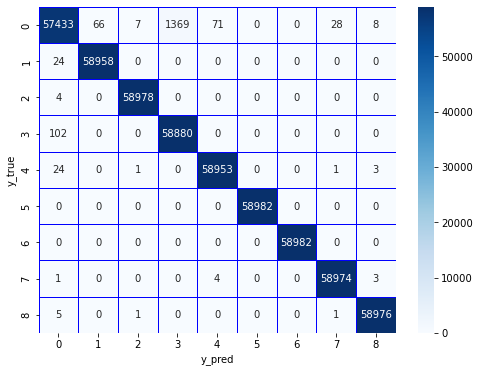

In [23]:
extra_tree = ExtraTreesClassifier(random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_acc_xtra = []
start_time = time.time()  
for train_index, test_index in skf.split(X, y):
    X_train_fxtra, X_test_fxtra = X[train_index], X[test_index]
    y_train_fxtra, y_test_fxtra = y[train_index], y[test_index]
    extra_tree.fit(X_train_fxtra, y_train_fxtra)
    skf_acc_xtra.append(extra_tree.score(X_test_fxtra, y_test_fxtra))
end_time = time.time()
time_elapsed = end_time-start_time
print('Training Time: ', time_elapsed)

# Save the Model
filename = './Models/extra_tree_model.sav'
joblib.dump(extra_tree, open(filename, 'wb'))
filename2 = './Models/extra_tree_model.pkl'
joblib.dump(extra_tree, open(filename2, 'wb'))

# Print the output.
print('List of possible accuracy:', skf_acc_xtra)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(skf_acc_xtra)*100, '%')
print('\nMinimum Accuracy:',
      min(skf_acc_xtra)*100, '%')
print('\nAverage Score: ', (np.mean(skf_acc_xtra)*100), '%')
print('\nStandard Deviation Score: ', (np.std(skf_acc_xtra)*100), '%')

# Making Predictions
test_time_start = time.time()
y_pred = extra_tree.predict(X_test_fxtra)
y_true = y_test_fxtra
test_time_stop = time.time()
time_taken_test = test_time_stop-test_time_start
print('Time taken to make predictions: ', time_taken_test)

# print the scores
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of Extra Tree: '+ (str(precision)))
print('Recall of Extra Tree: '+ (str(recall)))
print('F1 Score of Extra Tree: '+ (str(fscore)))

# print classifcation report
print("Classification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', linecolor='blue', linewidths=0.6, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./Images/Extra_tree_cm')
plt.show()

In [ ]:
# Making Predictions
test_time_start = time.time()
y_pred = extra_tree.predict(X_test_fxtra)
y_true = y_test_fxtra
test_time_stop = time.time()
time_taken_test = test_time_stop-test_time_start
print('Time taken to make predictions: ', time_taken_test)

# print the scores
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of Extra Tree: '+ (str(precision)))
print('Recall of Extra Tree: '+ (str(recall)))
print('F1 Score of Extra Tree: '+ (str(fscore)))

# print classifcation report
print("Classification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', linecolor='blue', linewidths=0.6, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./Images/Extra_tree_cm')
plt.show()

# Predictions for ROC Curve

Extra Tree ROC Value:  99.97732661959708 %


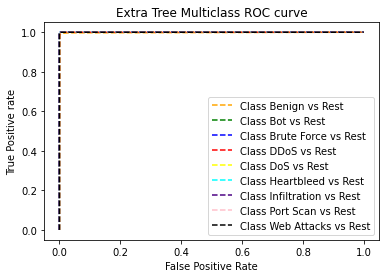

In [29]:
y_pred_prob = extra_tree.predict_proba(X_test_fxtra)
y_true = y_test_fxtra
roc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print('Extra Tree ROC Value: ', (roc)*100, '%')

# Plot roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 9

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_pred_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Bot vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Brute Force vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class DDoS vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class DoS vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='cyan', label='Class Heartbleed vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='Class Infiltration vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class Port Scan vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='black', label='Class Web Attacks vs Rest')

plt.title('Extra Tree Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('./Images/extra_tree_classifier_ROC',dpi=300); 

# XGBOOST Classifier

Training Time:  159495.1924817562
List of possible accuracy: [0.99512847562354, 0.9948553236380077, 0.9949080702283174, 0.9947724361389496, 0.9950926832944014, 0.9951058699419788, 0.9950776128400272, 0.9951661517594755, 0.9948006834463934, 0.9951699102741133]

Maximum Accuracy That can be obtained from this model is: 99.51699102741132 %

Minimum Accuracy: 99.47724361389496 %

Average Score:  99.50077217185205 %

Standard Deviation Score:  0.014802120373530092 %
Time taken to make predictions:  3.3729825019836426
Precision of Xgboost: 0.9952785150495024
Recall of Xgboost: 0.9951699102741133
F1 Score of Xgboost: 0.9951559816429575
Classification Report: 
               precision    recall  f1-score   support

           0     0.9971    0.9601    0.9783     58982
           1     0.9965    0.9999    0.9982     58982
           2     0.9999    0.9994    0.9996     58982
           3     0.9676    0.9997    0.9834     58982
           4     0.9985    0.9993    0.9989     58982
           5 

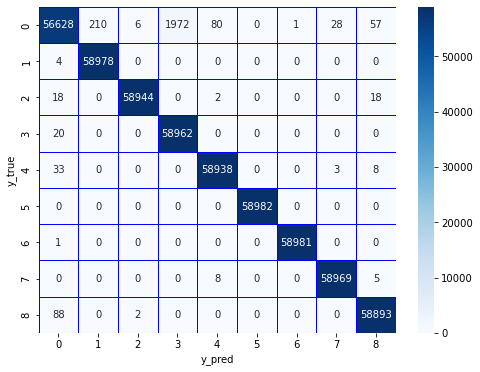

In [27]:
xgb = XGBClassifier(num_class=9, learning_rate=0.1, eval_metric='mlogloss', use_label_encoder =False, random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_acc_xgb = []
start_time = time.time()  
for train_index, test_index in skf.split(X, y):
    X_train_fxgb, X_test_fxgb = X[train_index], X[test_index]
    y_train_fxgb, y_test_fxgb = y[train_index], y[test_index]
    xgb.fit(X_train_fxgb, y_train_fxgb)
    skf_acc_xgb.append(xgb.score(X_test_fxgb, y_test_fxgb))
end_time = time.time()
time_elapsed = end_time-start_time
print('Training Time: ', time_elapsed)

# Save the Model
filename = './Models/Xgbclassifier_model.sav'
joblib.dump(xgb, open(filename, 'wb'))
filename2 = './Models/Xgbclassifier_model.pkl'
joblib.dump(xgb, open(filename2, 'wb'))

# Print the output.
print('List of possible accuracy:', skf_acc_xgb)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(skf_acc_xgb)*100, '%')
print('\nMinimum Accuracy:',
      min(skf_acc_xgb)*100, '%')
print('\nAverage Score: ', (np.mean(skf_acc_xgb)*100), '%')
print('\nStandard Deviation Score: ', (np.std(skf_acc_xgb)*100), '%')


# Making Predictions
test_time_start = time.time()
y_pred = xgb.predict(X_test_fxgb)
y_true = y_test_fxgb
test_time_stop = time.time()
time_taken_test = test_time_stop-test_time_start
print('Time taken to make predictions: ', time_taken_test)

# print the scores
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of Xgboost: '+ (str(precision)))
print('Recall of Xgboost: '+ (str(recall)))
print('F1 Score of Xgboost: '+ (str(fscore)))

# print classifcation report
print("Classification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', linecolor='blue', linewidths=0.6, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./Images/Xgboost_cm')
plt.show()

# Ploting ROC Curve

Extra Tree ROC Value:  99.97726062019784 %


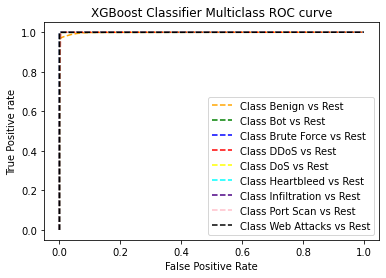

In [28]:
y_pred_prob = xgb.predict_proba(X_test_fxgb)
y_true = y_test_fxgb

roc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print('Extra Tree ROC Value: ', (roc)*100, '%')

# Plot roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 9

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_pred_prob[:,i], pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Benign vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class Bot vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class Brute Force vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class DDoS vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class DoS vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='cyan', label='Class Heartbleed vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='Class Infiltration vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class Port Scan vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='black', label='Class Web Attacks vs Rest')

plt.title('XGBoost Classifier Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('./Images/xgboost_classifier_ROC',dpi=300); 

## Printing ROC

# Getting the Parameters for the Ensemble

In [ ]:
# Decision Tree
dec_train = dec_tree.predict(X_train_f)
dec_test = dec_tree.predict(X_test_f)

# Random Forest
rfc_train = rfc.predict(X_train_f)
rfc_test = rfc.predict(X_test_f)

# Adaboost
ada_train = adaboost.predict(X_train_f)
ada_test = adaboost.predict(X_test_f)

# XGBoost
xgb_train = xgb.predict(X_train_f)
xgb_test = xgb.predict(X_test_f)

# LightGBM 
lgbm_train = lgbm.predict(X_train_f)
lgbm_test = lgbm.predict(X_test_f)

# Extra Tree
extra_t_train = extra_tree.predict(X_train_f)
extra_t_test = extra_tree.predict(X_test_f)

# Creating a STACK of the predictions from the Base models

In [ ]:
base_ensemble_train = pd.Dataframe({
    'Decision_Tree':dec_train.ravel(),
    'Random_Forest':rfc_train.ravel(),
    'Adaboost':ada_train.ravel(),
    'LightGBM':lgbm_train.ravel(),
    'Xgboost':xgb_train.ravel(),
    'Extra_Tree':exta_t_train.ravel(),
})
base_ensemble_train.head(5)

## Reshape the Train and Test sets

In [ ]:
# Decision Tree
dec_train = dec_train.reshape(-1,1)
dec_test = dec_test.reshape(-1,1)

# Random Forest
rfc_train = rfc_train.reshape(-1,1)
rfc_test = rfc_test.reshape(-1,1)

# Adaboost
ada_train = ada_train.reshape(-1,1)
ada_test = ada_test.reshape(-1,1)

# XGBoost
xgb_train = xgb_train.reshape(-1,1)
xgb_test = xgb_test.reshape(-1,1)

# LightGBM 
lgbm_train = lgbm_train.reshape(-1,1)
lgbm_test = lgbm_test.reshape(-1,1)

# Extra Tree
extra_t_train = extra_t_train.reshape(-1,1)
extra_t_test = extra_t_test.reshape(-1,1)

## Perform a concatenation of the train and test sets.

In [ ]:
X_train = np.concatenate((dec_train, rfc_train, ada_train, xgb_train, lgbm_train, extra_t_train), axis=1)
X_test = np.concatenate((dec_test, rfc_test, ada_test, xgb_test,lgbm_test, extra_t_test), axis=1)

### We use any of the models as a classifier for the ensemble model
We will in this phase use the `XGBOOST` for the ensemble and test on all other models later

In [ ]:

start_time = time.time() 
xgb_ensemble = XGBClassifier(random_state=42)
xgb_ensemble.fit(X_train, y_train_f)
score= xgb_ensemble.score(X_test, y_test_f)
end_time = time.time()
time_elapsed = end_time-start_time
print('Training Time: ', time_elapsed)

# Save the Model
filename = './Models/Xgb_ensemble_model.sav'
pickle.dump(xgb_ensemble, open(filename, 'wb'))

# Making Predictions
test_time_start = time.time()
y_pred = xgb_ensemble.predict(X_test)
y_true = y_test_f
test_time_stop = time.time()
time_taken_test = test_time_stop-test_time_start
print('Time taken to make predictions: ', time_taken_test)

# print the scores
print('Accuracy of Xgb_enseble: '+ (str(score)))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('Precision of Xgb_ensemble: '+ (str(precision)))
print('Recall of Xgb_ensemble: '+ (str(recall)))
print('F1 Score of Xgb_enseble: '+ (str(fscore)))

# print classifcation report
print("Classification Report: \n", classification_report(y_true, y_pred, digits=4))

# plot confusion Matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', linecolor='blue', linewidths=0.6, fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.savefig('./New folder/Xgboost_ensemble_cm')
plt.show()

# Voting Classifier Ensemble

In [17]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier

# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('DecisionTree', DecisionTreeClassifier(random_state=0)))
	models.append(('RandomForest', RandomForestClassifier(random_state=0)))
	#models.append(('Adaboost', AdaBoostClassifier(random_state=0)))
	models.append(('Xgboost', XGBClassifier(random_state=0)))
	models.append(('Lightgbm',LGBMClassifier(random_state=0)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['DecisionTree'] = DecisionTreeClassifier()
	models['RandomForest'] = RandomForestClassifier()
	#models['Adaboost'] = SVC(probability=True, kernel='poly', degree=3)
	models['Xgboost'] = XGBClassifier()
	models['Lightgbm'] = LGBMClassifier()
	models['hard_voting'] = get_voting()
	return models

# evaluate a give model using cross-validation
def evaluate_model(models, X, y):
	cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>DecisionTree 0.995 (0.000)
>RandomForest 0.994 (0.000)
>Xgboost 0.996 (0.000)
>Lightgbm 0.970 (0.029)
>hard_voting 0.996 (0.000)


NameError: name 'pyplot' is not defined

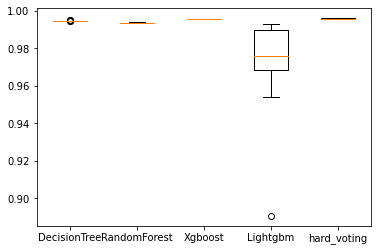

In [24]:
plt.boxplot(results, labels=names, showbox=True)
plt.show()

In [21]:
results

[array([0.99491373, 0.99462505, 0.99476481, 0.99474419, 0.9947625 ,
        0.99486102, 0.99475334, 0.99454256, 0.99476708, 0.99470752]),
 array([0.99389876, 0.99353448, 0.99359863, 0.9937338 , 0.99342907,
        0.99374754, 0.99372692, 0.99351155, 0.99383231, 0.99361465]),
 array([0.99589203, 0.99552546, 0.99580268, 0.99572707, 0.99578434,
        0.99565833, 0.99583246, 0.99559876, 0.9956927 , 0.99574768]),
 array([0.95427167, 0.99276008, 0.97265785, 0.97753792, 0.97459608,
        0.99018714, 0.96683835, 0.89065178, 0.98876894, 0.99106693]),
 array([0.99598597, 0.99565147, 0.99593327, 0.9958737 , 0.99588973,
        0.9957958 , 0.99588515, 0.99570415, 0.99577747, 0.99591952])]

In [22]:
names

['DecisionTree', 'RandomForest', 'Xgboost', 'Lightgbm', 'hard_voting']

In [25]:
results2 = [([0.99491373, 0.99462505, 0.99476481, 0.99474419, 0.9947625 ,
        0.99486102, 0.99475334, 0.99454256, 0.99476708, 0.99470752]),
            ([0.99389876, 0.99353448, 0.99359863, 0.9937338 , 0.99342907,
        0.99374754, 0.99372692, 0.99351155, 0.99383231, 0.99361465]),
            ([0.99589203, 0.99552546, 0.99580268, 0.99572707, 0.99578434,
        0.99565833, 0.99583246, 0.99559876, 0.9956927 , 0.99574768]),
            ([0.95427167, 0.99276008, 0.97265785, 0.97753792, 0.97459608,
        0.99018714, 0.96683835, 0.89065178, 0.98876894, 0.99106693]),
            ([0.99598597, 0.99565147, 0.99593327, 0.9958737 , 0.99588973,
        0.9957958 , 0.99588515, 0.99570415, 0.99577747, 0.99591952]),
           ([0.99998597, 0.99998597, 0.99998597, 0.99998597 , 0.99998597,
        0.99998597 , 0.99998597, 0.99998597, 0.99998597, 0.99998597])]

In [26]:
names2 = ['DecisionTree', 'RandomForest', 'Xgboost', 'Lightgbm', 'hard_voting', 'Stacking']

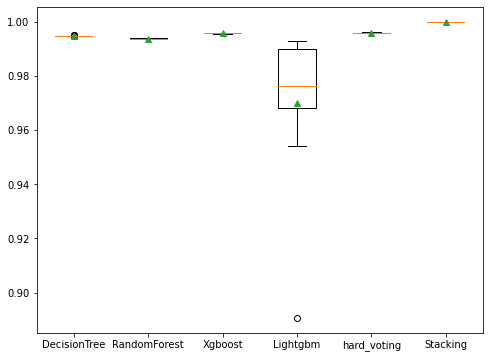

In [32]:
import seaborn as sns
plt.figure(figsize=(8,6))
plt.boxplot(results2, labels=names2, showbox=True, showfliers=True, showmeans=True)
plt.show()

Here, i will appraoch the classification in another manner


In [ ]:
models = list()
models.append(('DecisionTree', DecisionTreeClassifier(random_state=0)))
models.append(('RandomForest', RandomForestClassifier(random_state=0)))
models.append(('Adaboost', AdaBoostClassifier(random_state=0)))
models.append(('Xgboost', XGBClassifier(random_state=0)))
models.append(('Lightgbm',LGBMClassifier(random_state=0)))
# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')

# fit the model on all available data
ensemble.fit(X_train, y_train_f)

In [34]:
%%time
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier

# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	#models.append(('DecisionTree', DecisionTreeClassifier(random_state=0)))
	models.append(('RandomForest', RandomForestClassifier(random_state=0)))
	#models.append(('Adaboost', AdaBoostClassifier(random_state=0)))
	models.append(('Xgboost', XGBClassifier(random_state=0)))
	models.append(('Lightgbm',LGBMClassifier(random_state=0)))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	#models['DecisionTree'] = DecisionTreeClassifier()
	models['RandomForest'] = RandomForestClassifier()
	#models['Adaboost'] = SVC(probability=True, kernel='poly', degree=3)
	models['Xgboost'] = XGBClassifier()
	models['Lightgbm'] = LGBMClassifier()
	models['hard_voting'] = get_voting()
	return models

# evaluate a give model using cross-validation
def evaluate_model(models, X, y):
	cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>RandomForest 0.994 (0.000)


XGBoostError: bad allocation

# Stacking Classifier

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	base_model = list()
	base_model.append(('dt', DecisionTreeClassifier()))
	base_model.append(('rf', RandomForestClassifier()))
	base_model.append(('ad', AdaBoostClassifier()))
	base_model.append(('lgbm', LGBMClassifier()))
	base_model.append(('xgb', XGBClassifier()))
	# define meta learner model
	base_estimator = LGBMClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=base_model, final_estimator=base_estimator, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['dt'] = DecisionTreeClassifier()
	models['rf'] = RandomForestClassifier()
	models['ad'] = AdaBoostClassifier()
	models['lgbm'] = LGBMClassifier()
	models['xgb'] = XGBClassifier()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# # define dataset
# X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results_stack
results_stack, model_names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results_stack.append(scores)
	model_names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results_stack, labels=model_names, showmeans=True)
plt.show()

>dt 0.995 (0.000)
>rf 0.994 (0.000)
>ad 0.514 (0.038)
>lgbm 0.970 (0.029)
